In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

df = pd.read_excel(open('Inzidenz_Impfstatus (1).xlsx', 'rb'),
              sheet_name='Symptomatische_nach_Impfstatus', header = 3)

ungeimpft = df[['Meldewoche', 'Ungeimpfte 12-17 Jahre', 'Ungeimpfte 18-59 Jahre', 'Ungeimpfte 60+ Jahre']]
geimpft = df[['Meldewoche', 'Vollständig Geimpfte  12-17 Jahre', 'Vollständig Geimpfte  18-59 Jahre', 'Vollständig Geimpfte 60+ Jahre'
]]

ungeimpft_data = ungeimpft.rename(columns={"Ungeimpfte 12-17 Jahre" : "12-17", "Ungeimpfte 18-59 Jahre" : "18-59", "Ungeimpfte 60+ Jahre" : "60+"})
ungeimpft_data
unge = pd.melt(ungeimpft_data, id_vars='Meldewoche', value_vars = ['12-17', '18-59', '60+'], var_name = 'age', value_name ='value')
unge

unge.insert(3, 'status', 'ungeimpft')
 
geimpft_data = geimpft.rename(columns={"Vollständig Geimpfte  12-17 Jahre" : "12-17", "Vollständig Geimpfte  18-59 Jahre" : "18-59", "Vollständig Geimpfte 60+ Jahre" : "60+"})

geimpf = pd.melt(geimpft_data, id_vars = 'Meldewoche', value_vars = ['12-17', '18-59', '60+'], var_name = 'age', value_name ='value')
geimpf

geimpf.insert(3, 'status', 'geimpft')
geimpf

data = pd.concat([unge, geimpf], axis = 0)
data

data['Meldewoche'] = data['Meldewoche'].apply(lambda x: "{}{}".format(x, 'WS 2021'))
data


,Meldewoche,age,value,status
0,28WS 2021,12-17,11.693346,ungeimpft
1,29WS 2021,12-17,18.638422,ungeimpft
2,30WS 2021,12-17,22.946386,ungeimpft
3,31WS 2021,12-17,35.889526,ungeimpft
4,32WS 2021,12-17,58.764240,ungeimpft
...,...,...,...,...
52,42WS 2021,60+,28.697884,geimpft
53,43WS 2021,60+,41.518642,geimpft
54,44WS 2021,60+,48.874451,geimpft
55,45WS 2021,60+,57.227184,geimpft


Meldewoche    object
age           object
value          int64
status        object
dtype: object


<Figure size 20000x7000 with 0 Axes>

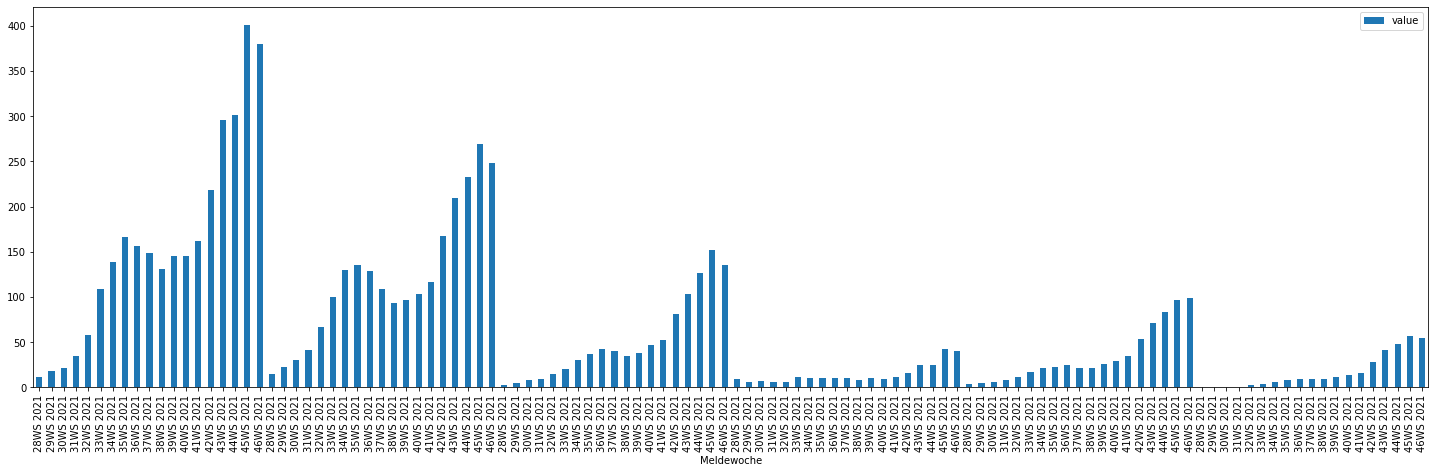

In [55]:
#df = pd.DataFrame(data)
#data.value=pd.to_numeric(data.value)
#data.age=pd.to_numeric(data.age)
#df.plot('Meldewoche', 'age
data['value'] = data['value'].apply(np.int64)
print(data.dtypes)



#data.apply(pd.value_counts).plot()
plt.figure(dpi =100, figsize=(200,70))
data.plot.bar(x= 'Meldewoche', y = 'value',  figsize = (25, 7))


plt.show()

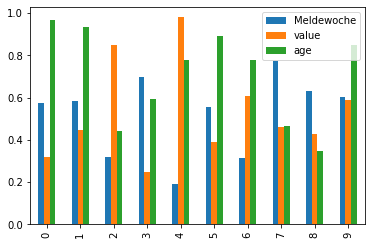

In [47]:
df = pd.DataFrame(data)
df2 = pd.DataFrame(np.random.rand(10, 3), columns=["Meldewoche", "value", "age"])
df2.plot.bar()

[]

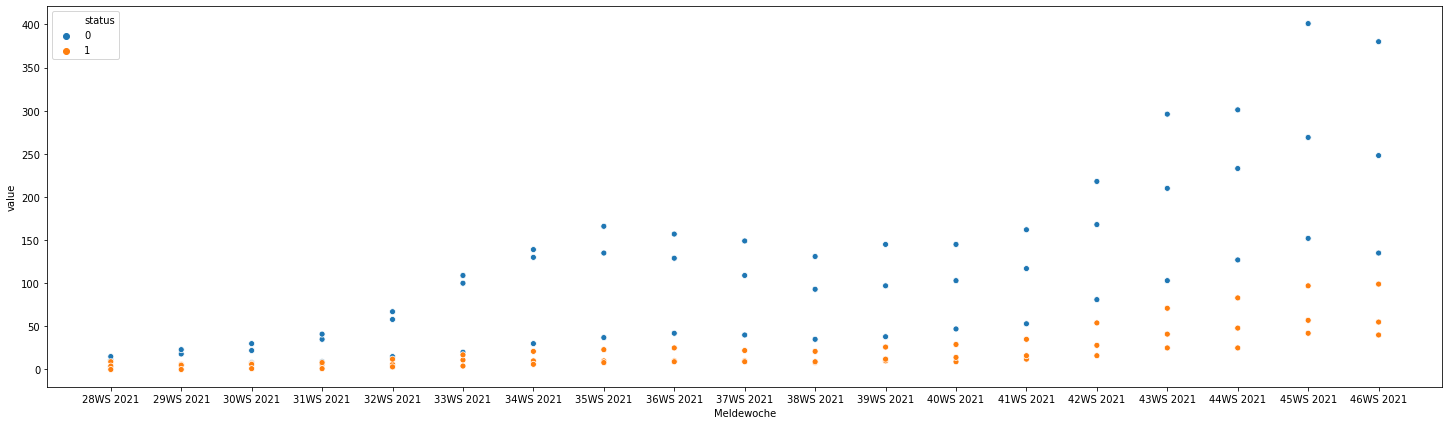

In [94]:
#df['status']= data.status.astype(int)
import seaborn as sns
data['status'].replace({'ungeimpft': '0', 'geimpft': '1'}, inplace = True)

plt.figure(figsize=(25, 7))

sns.scatterplot(data=data, hue='status', x=data['Meldewoche'], y=data['value'])
#plt.scatter(data["Meldewoche"], data["value"], c=data['status'], label = data['status'])

plt.plot(legend = True)
#plt.show()